DataSet Information
 timestamp,
 TempMax, TempMin, TempMean in Centigrade scale
 RelHumMax, RelHumMin, RelHumMean in %
 WindGustMax, WindGustMin, WindGustMean in m/s
 WindSpeedMax, WindSpeedMin, WindSpeedMean  in m/s
 SunShDurMin in m
 ShWaveRad, UVRad  W/m2
 Evapotranspiration  mm
 zone output class

Data Mining: Selecting Data > Preprocessing Data > Transforming Data > Storing Data > Mining Data > Evaluating Mining *Results*

In [ ]:
#pip install pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dhaka_Jan-1972-to-Jan-2025.csv to Dhaka_Jan-1972-to-Jan-2025 (1).csv


In [ ]:
data = pd.read_csv("Dhaka_Jan-1972-to-Jan-2025 (1).csv")

In [ ]:
data.shape

(19371, 7)

In [ ]:
# Add a new column 'zone' to the DataFrame, initializing with a default value (e.g., 0)
data['zone'] = 0

for i in range (0, 19371):
    if data.TempMean[i] <=20:
        data.zone[i] = 1
    elif data.TempMean[i] <=25 and data.TempMean[i] > 20:
        data.zone[i] = 2
    elif data.TempMean[i] <=30 and data.TempMean[i] > 25:
        data.zone[i] = 3
    else:
        data.zone[i] = 4

In [ ]:
data.isnull().sum()


,0
date,0
TempMax,0
TempMin,0
TempMean,0
RelHumMax,0
RelHumMin,0
RelHumMean,0
zone,0


In [ ]:
data['zone'] = data['zone'].astype(int)
display(data['zone'].dtype)

dtype('int64')

In [ ]:
data.describe()


,TempMax,TempMin,TempMean,RelHumMax,RelHumMin,RelHumMean,zone
count,19371.000000,19371.000000,19371.000000,19371.000000,19371.000000,19371.000000,19371.000000
mean,30.128295,21.594507,25.459368,94.881385,57.806983,79.059629,2.560064
std,3.349037,5.249290,4.177867,3.119308,15.676304,8.400976,0.842620
min,16.330000,6.450000,10.638000,63.630000,13.755000,27.320000,1.000000
25%,28.010000,17.100000,22.347000,93.525500,45.011500,74.358500,2.000000
50%,30.680000,23.740000,26.986000,95.330000,59.999000,80.567000,3.000000
75%,32.440000,25.980000,28.656500,96.857500,70.452000,85.000500,3.000000
max,40.200000,29.500000,34.043000,100.138000,95.042000,97.491000,4.000000


In [ ]:
#count zone
data['zone'].value_counts()

,count
zone,
3,10950
2,3931
1,3027
4,1463


In [ ]:
max(data["TempMean"])

34.043

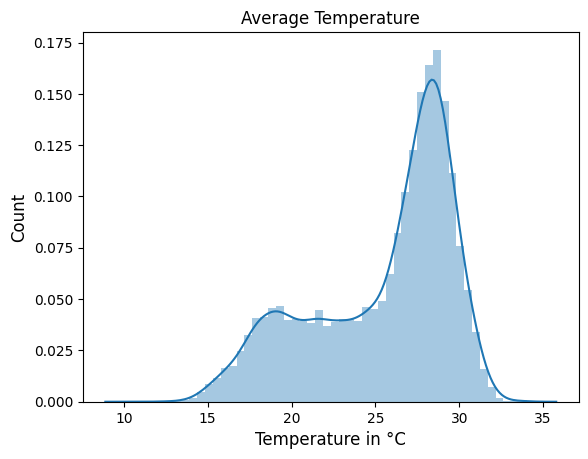

In [ ]:
# visualization
#data["TempMean"].hist(figsize=(6,5))
sns.distplot(data['TempMean']) #, color = 'green'
plt.title('Average Temperature', fontsize=12, color='black')
plt.xlabel('Temperature in °C', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.show()

In [ ]:
#sns.distplot(data['TempMean'],bins=5)

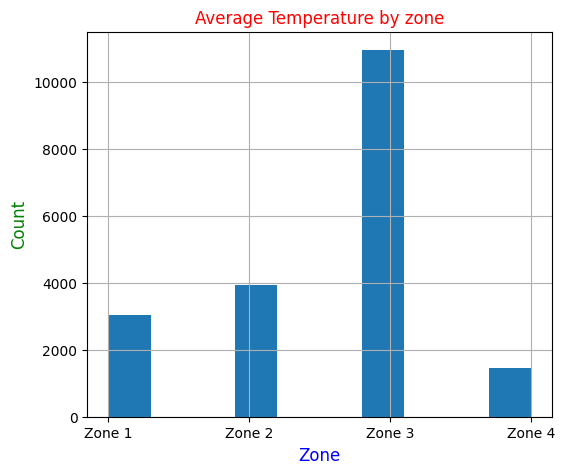

In [ ]:
# visualization
data["zone"].hist(figsize=(6,5))
plt.title('Average Temperature by zone', fontsize=12, color='r')
plt.xlabel('Zone', fontsize=12, color='b')
plt.ylabel('Count', fontsize=12, color='g')
plt.xticks([1, 2, 3, 4], ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4'])
plt.show()

In [ ]:
#copy data to df
df = data.copy()

Data Visualization & Assumption Testing
In this part of the analysis, we are going to visualize the the distribution of all the values. Then, we will try to determine if there are any relationships between somo features and the target data.

# Date column can be split to Year and Month as this will make the dataset more robust and help in the analysis

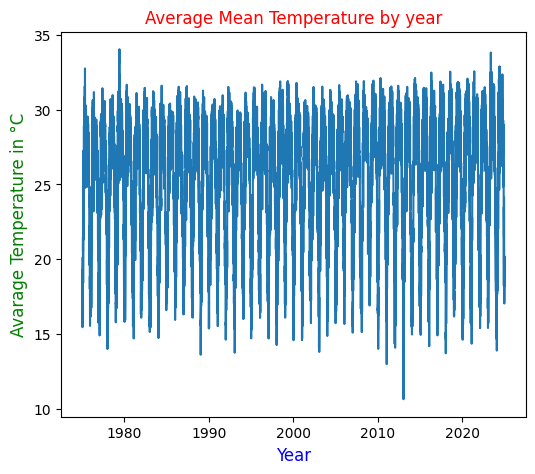

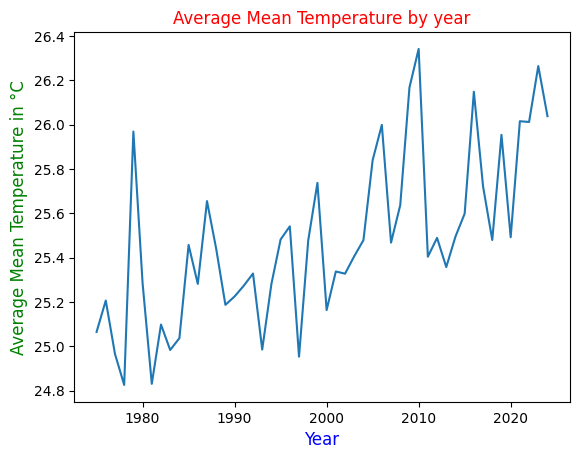

In [ ]:
# Ensure 'date' is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Add Year and Month columns before filtering
data['Year'] = pd.DatetimeIndex(data['date']).year
data['Month'] = pd.DatetimeIndex(data['date']).month

# Filter data for the year 2024
data_2024 = data[data['date'].dt.year < 2025]

# Plotting the filtered data
plt.figure(figsize=(6, 5))
plt.plot(data_2024['date'], data_2024['TempMean'])

plt.title('Average Mean Temperature by year', fontsize=12, color='r')
plt.xlabel('Year', fontsize=12, color='b')
plt.ylabel('Avarage Temperature in °C', fontsize=12, color='g')
plt.show()

# Group by year and plot the mean TempMax
data_2024.groupby(data_2024['date'].dt.year)['TempMean'].mean().plot(kind='line')
plt.title('Average Mean Temperature by year', fontsize=12, color='r')
plt.xlabel('Year', fontsize=12, color='b')
plt.ylabel('Average Mean Temperature in °C', fontsize=12, color='g')
plt.show()

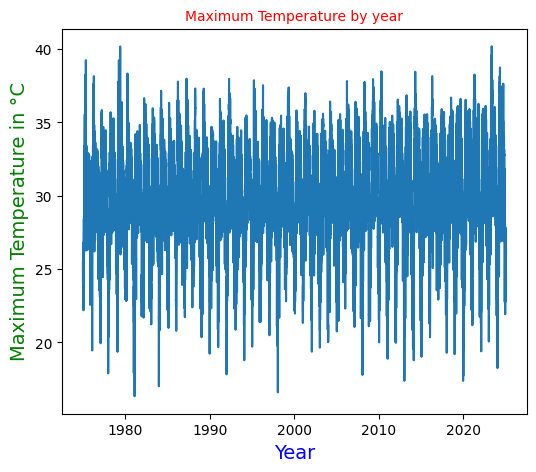

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(data_2024['date'], data_2024['TempMax'])

plt.title('Maximum Temperature by year', fontsize=10, color='r')
plt.xlabel('Year', fontsize=14, color='b')
plt.ylabel('Maximum Temperature in °C', fontsize=14, color='g')
plt.show()

In [ ]:
data['Year'] = pd.DatetimeIndex(data['date']).year
data['Month'] = pd.DatetimeIndex(data['date']).month

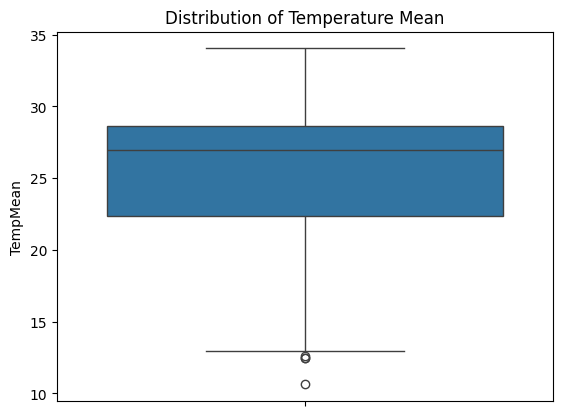

In [ ]:
sns.boxplot(data['TempMean'])
plt.title("Distribution of Temperature Mean")
plt.show()


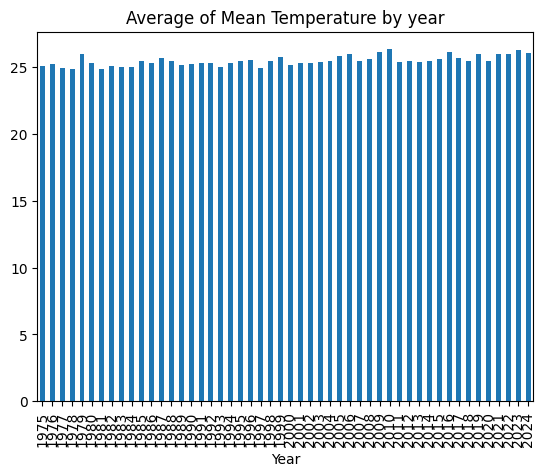

In [ ]:
data_2024 = data[pd.DatetimeIndex(data['date']).year < 2025]
data_2024.groupby('Year')['TempMean'].mean().plot(kind='bar')
plt.title("Average of Mean Temperature by year")
plt.show()


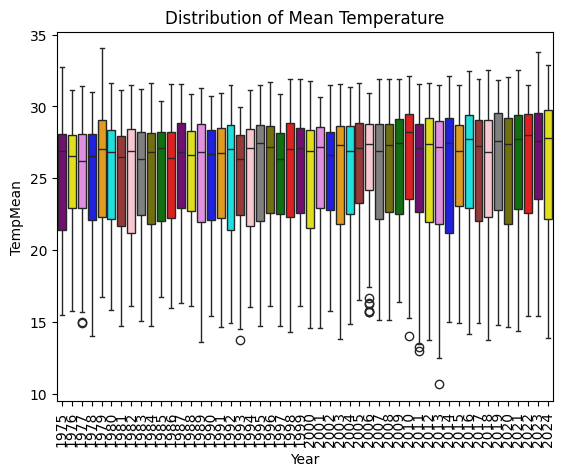

In [ ]:
data_2024 = data[pd.DatetimeIndex(data['date']).year < 2025]
color_set = {"violet","blue","green","yellow","red", "purple","orange", "pink", "brown", "gray", "olive", "cyan"}
sns.boxplot(x='Year', y='TempMean', data=data_2024, palette=color_set)
plt.title("Distribution of Mean Temperature")
plt.xticks(rotation=90)
plt.show()


In [ ]:
data['TempMean'].dtype
num_col = [i for i in data.columns if data[i].dtype == 'int64' or data[i].dtype == 'float64']

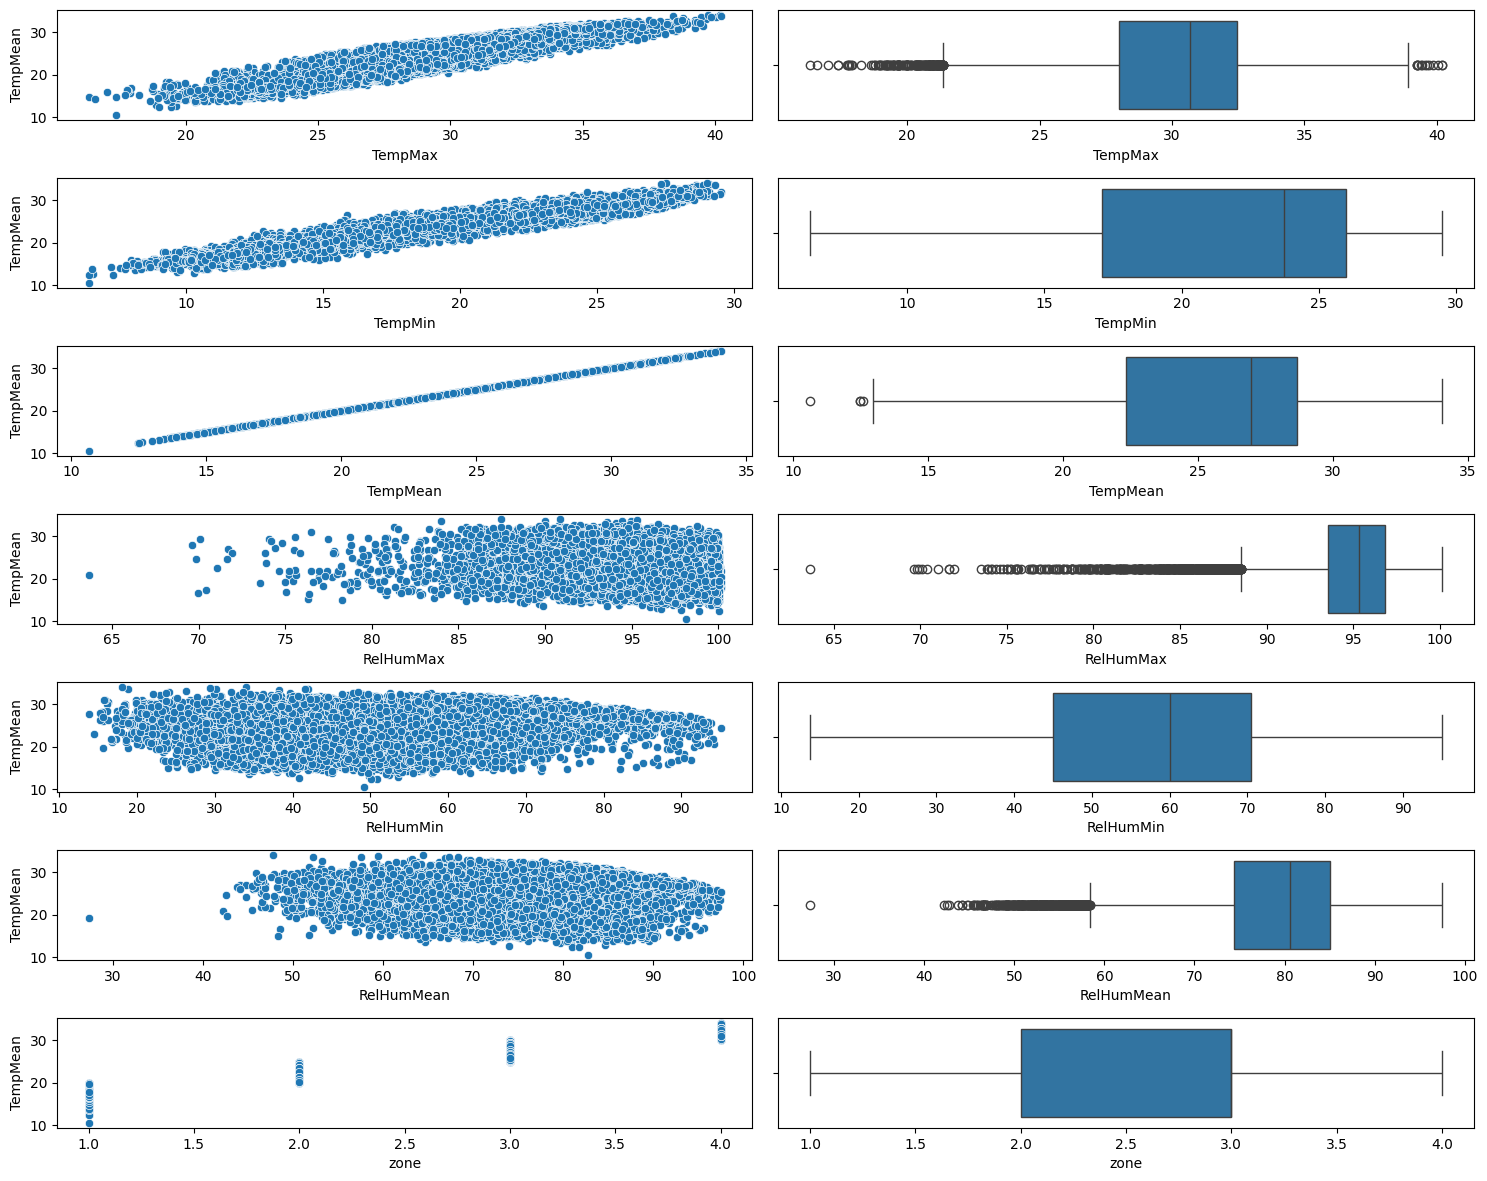

In [ ]:
c = 1
num_col = data.select_dtypes(include=['float64', 'int64']).columns  # Ensure num_col contains numerical columns

plt.figure(figsize=(15, 35))

for i in num_col:
    plt.subplot(21, 2, c)
    sns.scatterplot(x=data[i], y=data['TempMean'])
    plt.xlabel(i)
    plt.ylabel('TempMean')
    c += 1

    plt.subplot(21, 2, c)
    sns.boxplot(x=data[i])
    plt.xlabel(i)
    c += 1

plt.tight_layout()
plt.show()

#Changing the Column data type to the required Data type.

data['TempMean'] = pd.to_numeric(data['TempMean'])


In [ ]:
data

<Axes: >

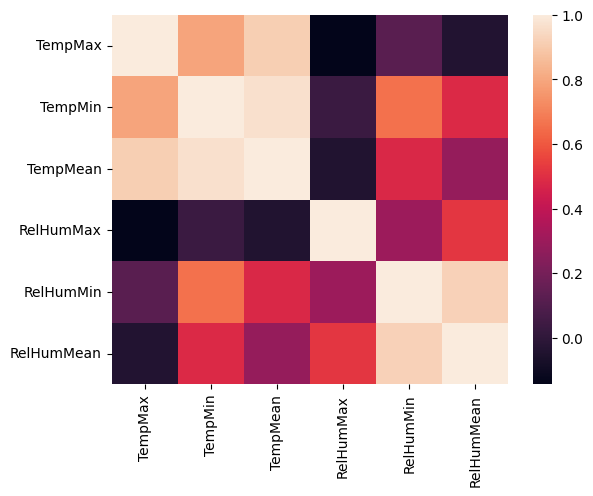

In [ ]:
# Correcting the column selection by passing a list of column names
xc = data.drop(columns=['date', 'zone', 'Month', 'Year'])
sns.heatmap(xc.corr())

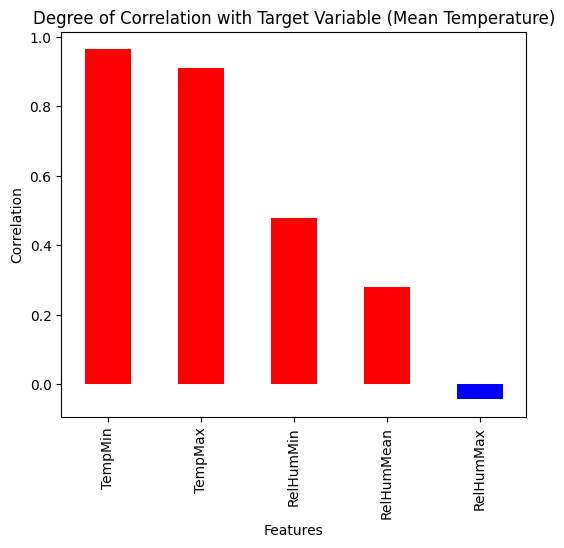

In [ ]:
# Assuming df is your DataFrame
corr_matrix = xc.corr()

# Extracting the correlation values for the target variable
r = corr_matrix["TempMean"].sort_values(ascending=False)

# Dropping the target variable itself from the list
r.drop(["TempMean"], inplace=True)

# Plotting the correlation values
plt.figure(figsize=(6, 5))
plt.title("Degree of Correlation with Target Variable (Mean Temperature)")
plt.xlabel("Features")
plt.ylabel("Correlation")

# Define colors based on correlation value
colors = ['red' if val > 0 else 'blue' for val in r]
r.plot(kind="bar", color = colors)
plt.show()

In [ ]:
X = xc.drop(columns=['TempMean'])  # Replace 'target_variable' with actual column name
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
print(vif_data[vif_data['VIF'] < 5])

      Feature          VIF
0       const  1381.819446
1     TempMax    11.069434
2     TempMin    19.822876
3   RelHumMax     1.949201
4   RelHumMin    19.311223
5  RelHumMean    13.341457
     Feature       VIF
3  RelHumMax  1.949201


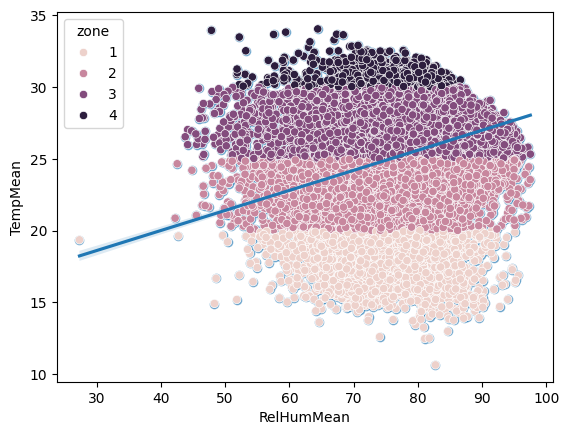

In [ ]:
sns.regplot(data=data, x='RelHumMean', y='TempMean', scatter_kws={'alpha': 0.5}) # Plot regression line
sns.scatterplot(data=data, x='RelHumMean', y='TempMean', hue='zone') # Add scatter plot with color
plt.show()

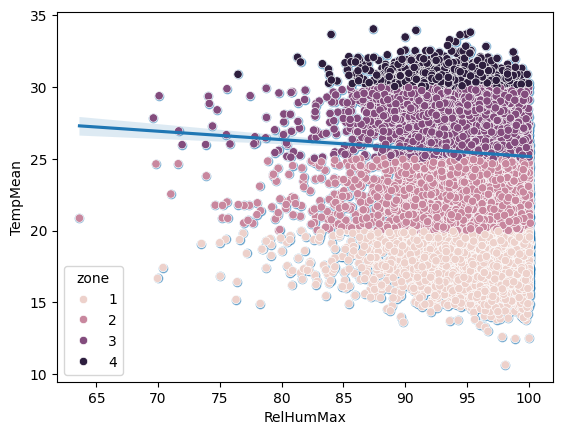

In [ ]:
sns.regplot(data=data, x='RelHumMax', y='TempMean', scatter_kws={'alpha': 0.5}) # Plot regression line
sns.scatterplot(data=data, x='RelHumMax', y='TempMean', hue='zone')
plt.show()


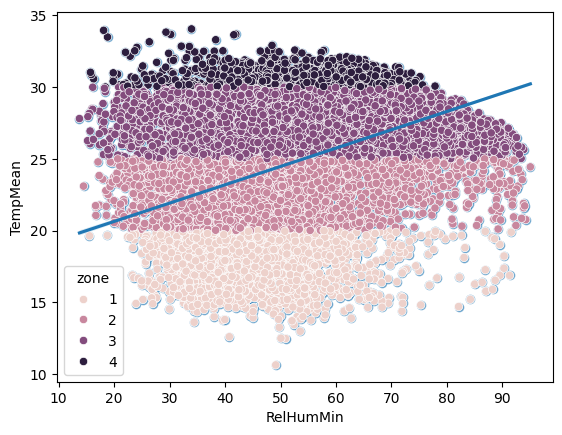

In [ ]:
sns.regplot(data=data, x='RelHumMin', y='TempMean', scatter_kws={'alpha': 0.5}) # Plot regression line
sns.scatterplot(data=data, x='RelHumMin', y='TempMean', hue='zone') # Add scatter plot with color
plt.show()

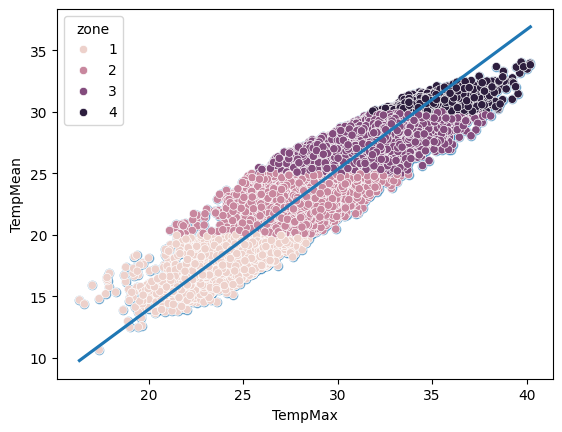

In [ ]:
sns.regplot(data=data, x='TempMax', y='TempMean', scatter_kws={'alpha': 0.5}) # Plot regression line
sns.scatterplot(data=data, x='TempMax', y='TempMean', hue='zone') # Add scatter plot with color
plt.show()

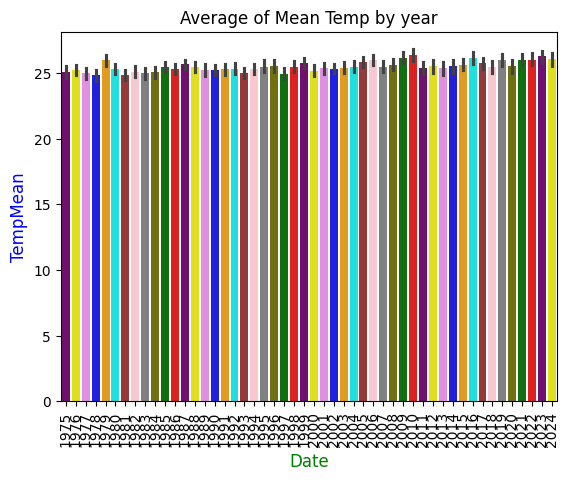

In [ ]:
data_2024 = data[pd.DatetimeIndex(data['date']).year < 2025]
color_set = {"violet","blue","green","yellow","red", "purple","orange", "pink", "brown", "gray", "olive", "cyan"}
sns.barplot(x='Year', y='TempMean', data=data_2024, palette=color_set)
plt.title("Average of Mean Temp by year")
plt.ylabel('TempMean', fontsize=12, color='b')
plt.xlabel('Date', fontsize=12, color='g')
plt.xticks(rotation=90)
plt.show()

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'TempMax'}>,
        <Axes: title={'center': 'TempMin'}>],
       [<Axes: title={'center': 'TempMean'}>,
        <Axes: title={'center': 'RelHumMax'}>,
        <Axes: title={'center': 'RelHumMin'}>],
       [<Axes: title={'center': 'RelHumMean'}>,
        <Axes: title={'center': 'zone'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>, <Axes: >, <Axes: >]],
      dtype=object)

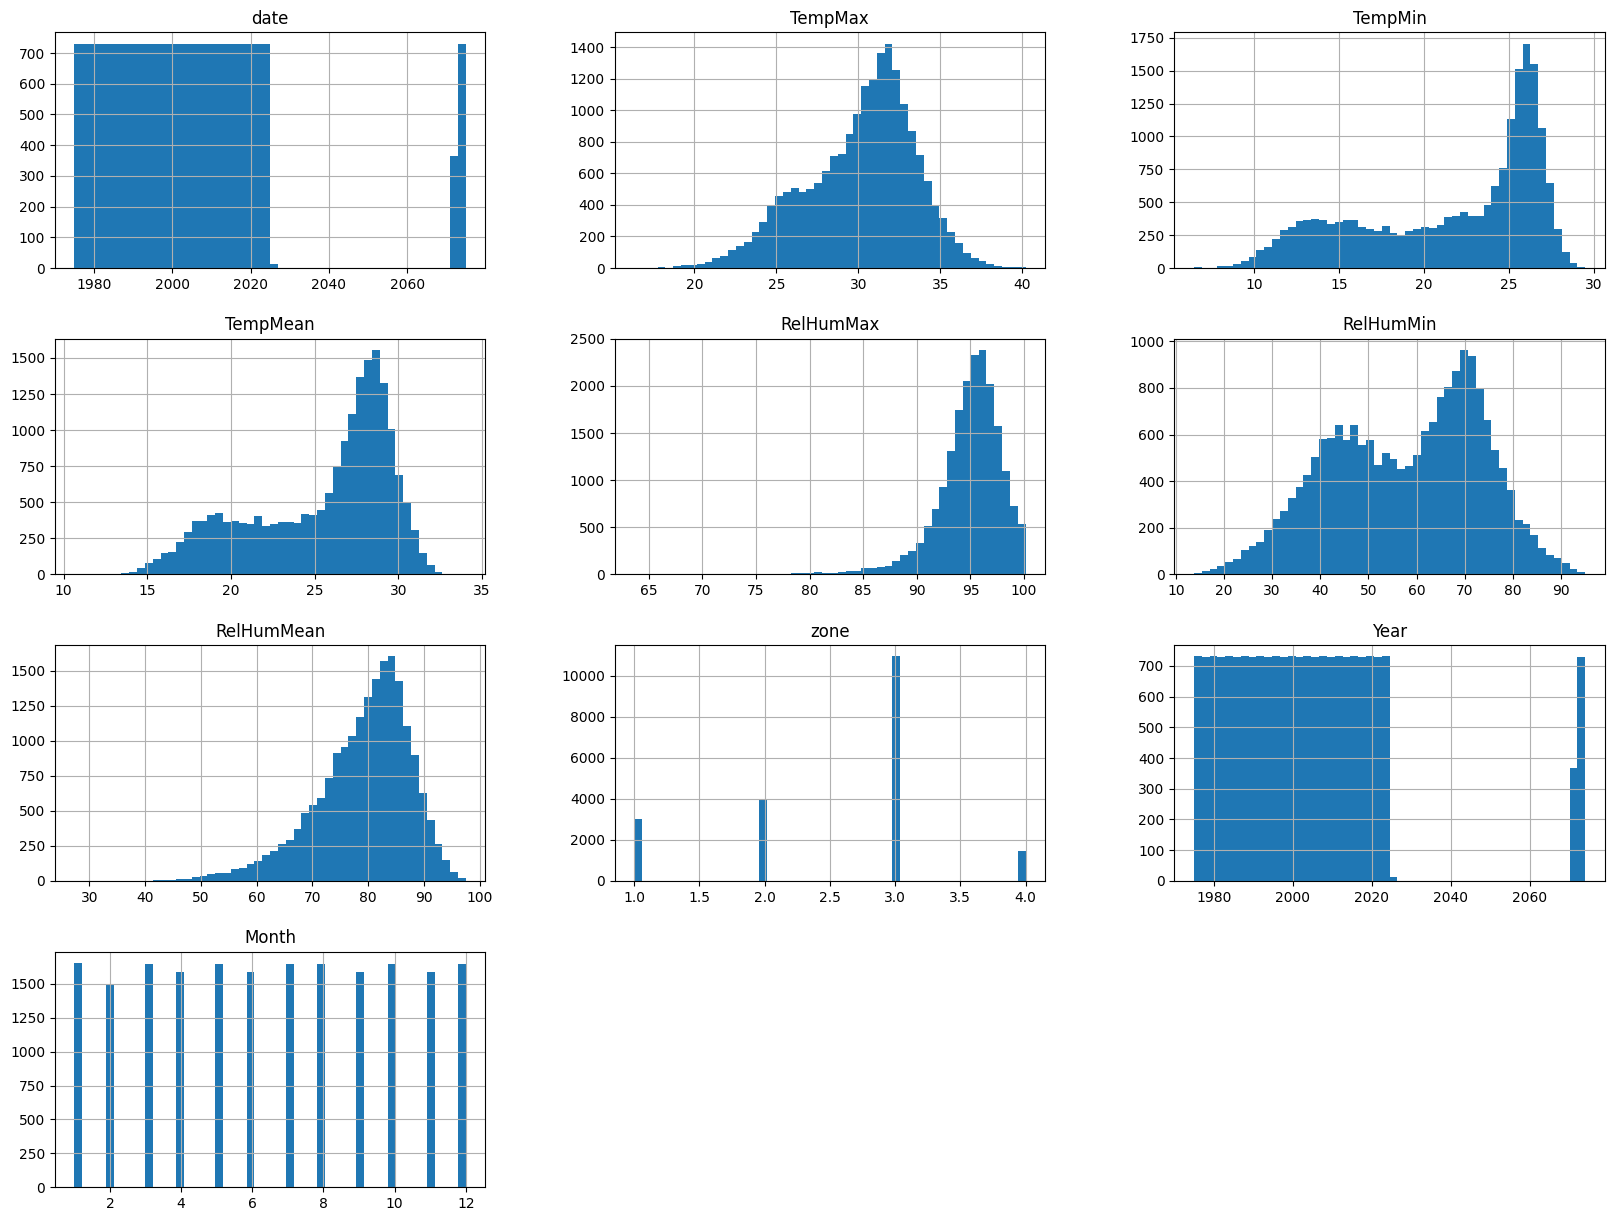

In [ ]:
data.hist(bins=50, figsize=(20, 15))

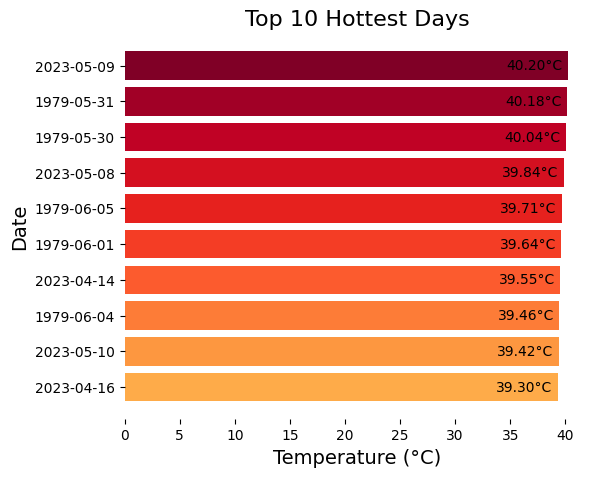

In [ ]:
# Get the 10 hottest days
top10_hot_days = data.nlargest(10, 'TempMax')

# Sorting the values so the hottest day is at the top
top10_hot_days = top10_hot_days.sort_values('TempMax', ascending=True).head(10)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 5))

# Color gradient - using more pleasant colors; feel free to adjust
colors = plt.cm.YlOrRd(np.linspace(0.4, 1, 10))

bars = ax.barh(top10_hot_days['date'].astype(str), top10_hot_days['TempMax'], color=colors)

# Point out the actual temperature on each bar
for bar in bars:
    ax.text(bar.get_width() - 0.5,  # x-coordinate
            bar.get_y() + bar.get_height() / 2,  # y-coordinate
            f"{bar.get_width():.2f}°C",  # text
            va='center', ha='right', color='black', fontsize=10)

# Remove the frame/spines
for spine in ["top", "right", "bottom", "left"]:
    ax.spines[spine].set_visible(False)

# Title and labels
ax.set_title("Top 10 Hottest Days", fontsize=16)
ax.set_xlabel("Temperature (°C)", fontsize=14)
ax.set_ylabel("Date", fontsize=14)

plt.show()

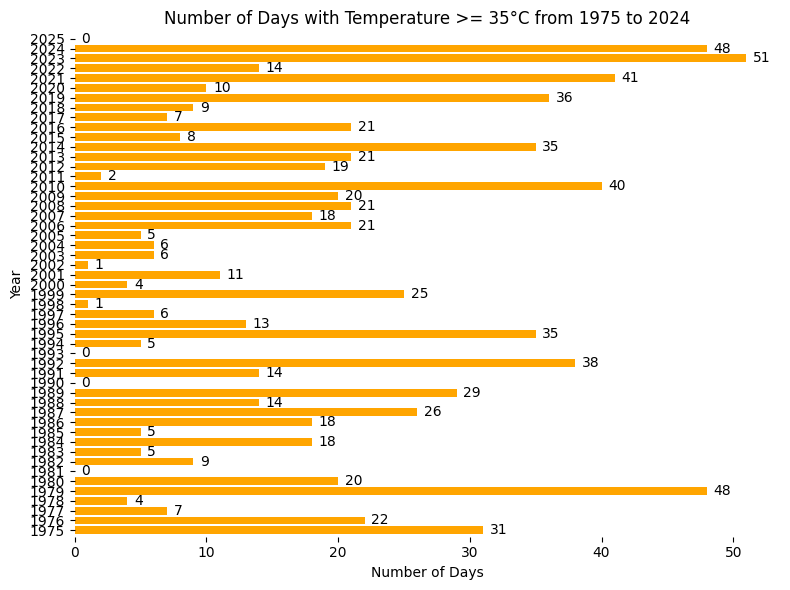

In [ ]:
# Filter data for years from 2014 to 2023
df_filtered = data[(data['date'].dt.year <= 2025)]

# Create a new column 'hot_day' indicating if tempmax was 100°F or greater
df_filtered['hot_day'] = df_filtered['TempMax'] >= 35

# Group by the year and sum the number of hot days
hot_days_by_year = df_filtered.groupby(df_filtered['date'].dt.year)['hot_day'].sum()

# Plot the results using a horizontal bar chart
plt.figure(figsize=(8, 6))
ax = hot_days_by_year.plot(kind='barh', color='orange', width=0.8)  # adjust the width parameter for thicker bars
plt.title('Number of Days with Temperature >= 35°C from 1975 to 2024')
plt.xlabel('Number of Days')
plt.ylabel('Year')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Annotate the number of days on each bar
for index, value in enumerate(hot_days_by_year):
    ax.text(value + 0.5, index, str(int(value)), va='center')

plt.tight_layout()
plt.show()

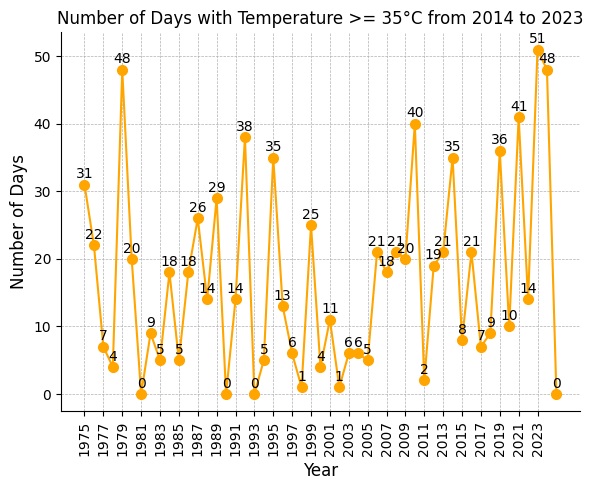

In [ ]:
# Plot the line chart
plt.figure(figsize=(6, 5))
ax = hot_days_by_year.plot(marker='o', linestyle='-', color='orange', markersize=7)

# Annotate each point with the number of hot days
for x, y in zip(hot_days_by_year.index, hot_days_by_year.values):
    ax.text(x, y + 0.5, str(int(y)), ha='center', va='bottom')

plt.title('Number of Days with Temperature >= 35°C from 2014 to 2023', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Days', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(1975, 2024,2), rotation = 90)  # Set ticks for each year in the range
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

<Figure size 600x500 with 0 Axes>

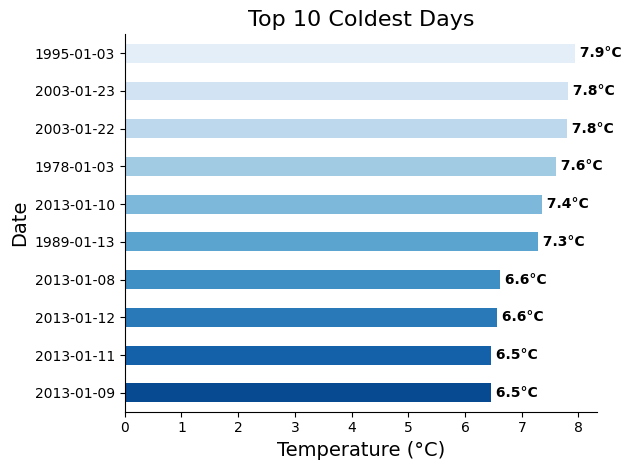

In [ ]:
# Define the top 10 coldest days
top_10_coldest_days = data.sort_values(by='TempMin', ascending=True).head(10)

# Convert 'datetime' column to string format containing only the date
top_10_coldest_days['date'] = top_10_coldest_days['date'].dt.strftime('%Y-%m-%d')

# Plotting
plt.figure(figsize=(6, 5))
colors = plt.cm.Blues_r(np.linspace(0.1, 0.9, len(top_10_coldest_days)))  # Adjusting the color gradient
ax = top_10_coldest_days.plot(x='date', y='TempMin', kind='barh', color=colors, legend=False)

# Title and labels
plt.title('Top 10 Coldest Days', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Date', fontsize=14)

# Annotations on each bar with one decimal point
for index, value in enumerate(top_10_coldest_days['TempMin']):
    ax.text(value, index, f' {value:.1f}°C', va='center', color='black', fontweight='bold')

# Remove unwanted spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the chart
plt.tight_layout()
plt.show()

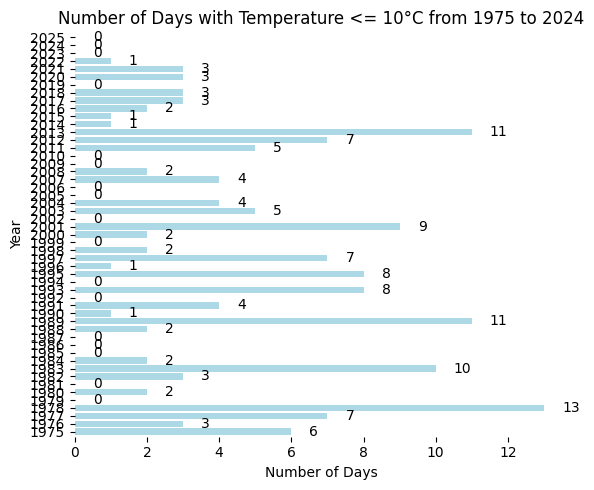

In [ ]:
# Create a new column 'cold_day' indicating if tempmin was 10°C or below
df_filtered['cold_day'] = df_filtered['TempMin'] <= 10

# Group by the year and sum the number of cold days
cold_days_by_year = df_filtered.groupby(df_filtered['date'].dt.year)['cold_day'].sum()

# Plot the results using a horizontal bar chart
plt.figure(figsize=(6, 5))
ax = cold_days_by_year.plot(kind='barh', color='lightblue', width=0.8)  # adjust the width parameter for thicker bars
plt.title('Number of Days with Temperature <= 10°C from 1975 to 2024')
plt.xlabel('Number of Days')
plt.ylabel('Year')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Annotate the number of days on each bar
for index, value in enumerate(cold_days_by_year):
    ax.text(value + 0.5, index, str(int(value)), va='center')

plt.tight_layout()
plt.show()

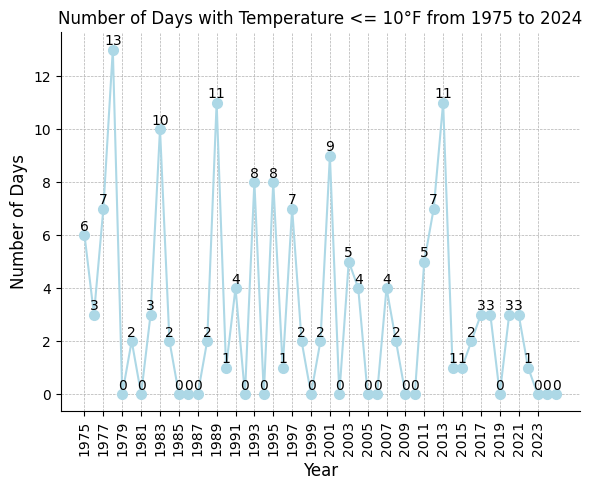

In [ ]:
# Plot the line chart
plt.figure(figsize=(6, 5))
ax = cold_days_by_year.plot(marker='o', linestyle='-', color='lightblue', markersize=7)

# Annotate each point with the number of cold days
for x, y in zip(cold_days_by_year.index, cold_days_by_year.values):
    ax.text(x, y+0.05 , str(int(y)), ha='center', va='bottom')

plt.title('Number of Days with Temperature <= 10°F from 1975 to 2024', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Days', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(1975, 2024,2), rotation =90)  # Set ticks for each year in the range
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

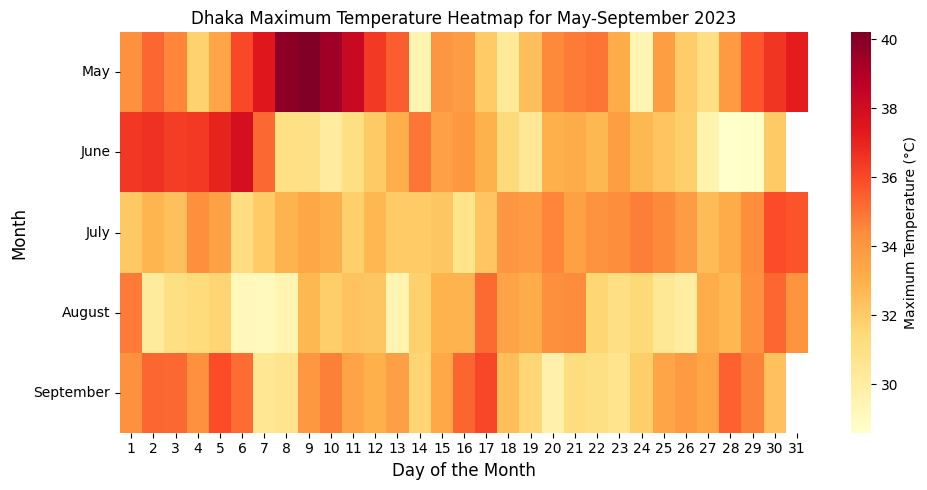

In [ ]:
# Filter the data for May to September of 2023
summer_2023_extended = data[(data['date'].dt.year == 2023) &
                                  (data['date'].dt.month.isin([5, 6, 7, 8, 9]))]

# Creating a pivot table for the heatmap. Days on x-axis, month on y-axis.
heatmap_data = summer_2023_extended.pivot_table(values='TempMax',
                                               index=summer_2023_extended['date'].dt.month,
                                               columns=summer_2023_extended['date'].dt.day,
                                               aggfunc=np.mean)

# Display the heatmap
plt.figure(figsize=(10, 5))  # Increased figure width for better clarity
sns.heatmap(heatmap_data, cmap='YlOrRd', fmt=".1f", cbar_kws={'label': 'Maximum Temperature (°C)'})
plt.title("Dhaka Maximum Temperature Heatmap for May-September 2023", fontsize=12)#, fontweight='bold'
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.yticks(ticks=np.arange(0.5, 5.5), labels=['May', 'June', 'July', 'August', 'September'], rotation=0)
plt.tight_layout()
plt.show()

# Interpreting VIF:
- VIF = 1 → No correlation between this variable and others.
- VIF < 5 → Moderate correlation, generally acceptable.
- VIF > 10 → Strong multicollinearity; consider removing or transforming the variable.
If certain variables have high VIF values, you can:
- Remove one of the correlated features.
- Apply dimensionality reduction techniques like PCA.
- Use regularization techniques (Lasso or Ridge regression).


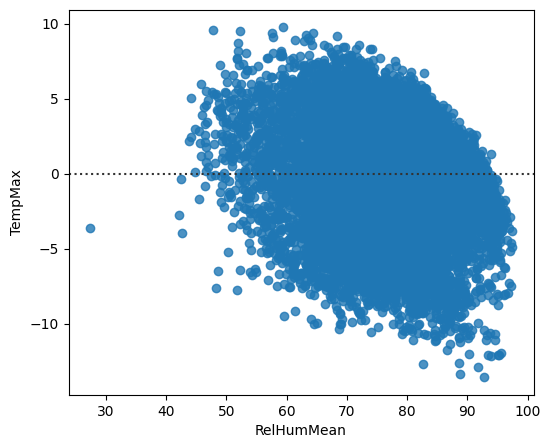

In [ ]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.residplot(x=data['RelHumMean'],y=data['TempMax'])
plt.show()

# Residual Plot
A good way to visualize the variance of the data is to use a residual plot.

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

In [ ]:
xc = data.drop(columns=['date', 'Year', 'Month'])
xc

,TempMax,TempMin,TempMean,RelHumMax,RelHumMin,RelHumMean,zone
0,26.92,13.72,19.767,90.249,38.230,66.266,1
1,24.65,12.33,18.825,93.620,43.909,68.214,1
2,24.15,14.32,18.549,94.320,39.953,68.290,1
3,24.47,11.29,18.124,94.066,38.128,69.626,1
4,24.85,12.31,17.808,94.992,42.912,72.677,1
...,...,...,...,...,...,...,...
19366,20.74,12.98,16.620,95.140,66.000,86.600,1
19367,22.85,12.68,16.740,94.760,55.120,81.830,1
19368,24.55,11.70,17.060,98.430,47.160,81.240,1
19369,26.42,12.19,17.910,98.120,39.980,78.290,1


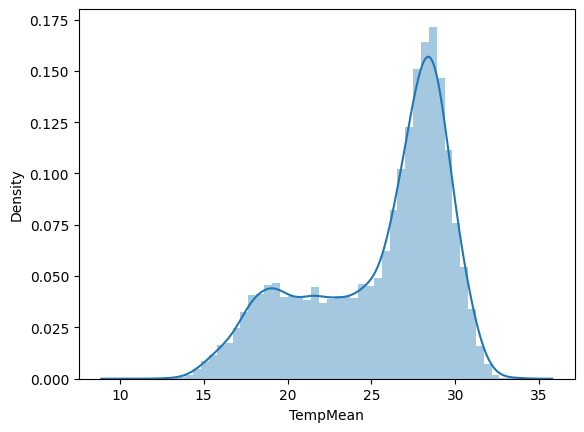

In [ ]:
sns.distplot(data['TempMean'])
plt.show()

In [ ]:
xc.to_csv('DhakaDaily1975to2014P.csv', index=False)
files.download('DhakaDaily1975to2014P.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>